In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv("lstm_data.csv")
#data = data.drop(['week','Unnamed: 0'],axis=1)
data = data['region2']
data

0       0
1       0
2       0
3       0
4       0
       ..
2622    0
2623    0
2624    0
2625    0
2626    0
Name: region2, Length: 2627, dtype: int64

In [14]:
data = data
data = np.array(data)
data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
import numpy as np
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [16]:
n_steps = 500
X, y = splitSequence(data, n_steps)

In [17]:
print(X.shape,y.shape)

(2127, 500) (2127,)


In [18]:
print(X[0],y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [19]:
n_features = 1
print(y.shape)

(2127,)


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
mod1 = tf.keras.Sequential()
mod1.add(layers.Dense(50, activation='sigmoid'))
mod1.add(layers.Dropout(0.2))
mod1.add(layers.Dense(100,activation='softmax'))
mod1.add(layers.Dense(1))

In [22]:
mod1.layers


In [23]:
mod1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])


In [24]:
mod1.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
67/67 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.8999
Epoch 2/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.8999
Epoch 3/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.8999
Epoch 4/50
67/67 [==============================] - 0s 6ms/step - loss: 0.0880 - accuracy: 0.8999
Epoch 5/50
67/67 [==============================] - 0s 7ms/step - loss: 0.0860 - accuracy: 0.8999
Epoch 6/50
67/67 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.8999
Epoch 7/50
67/67 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.8999
Epoch 8/50
67/67 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.8999
Epoch 9/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.8999
Epoch 10/50
67/67 [==============================] - 0s 5ms/step - loss: 0.0740 - accuracy: 0.8999
Epoch 11/50
67/67 [

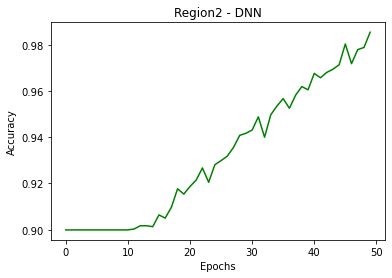

In [26]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.arange(0, 50)
res = np.array([0.8999, 0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.9003,0.9017,0.9017,0.9013,0.9064
,0.9050,0.9097,0.9177,0.9154,0.9187,0.9215,0.9267,0.9205,0.9281,0.9299,0.9318,0.9356,0.9408,0.9417,0.9431,0.9488,0.94,0.9497,0.9535
,0.9567,0.9525,0.9582,0.9619,0.9605,0.9676,0.9657,0.9680,0.9694,0.9713,0.9803,0.9718,0.9779, 0.9788,0.9854])
plt.title("Region2 - DNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(xaxis, res, color ="green")
plt.show()